In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/kc_house_data.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
print(f'Nulls Percentage:\n {(df.isnull().sum() / len(df) * 100)}')

Nulls Percentage:
 id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


In [ ]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
print(f"Unique values in bedrooms: {sorted(df['bedrooms'].unique())}")
print(f"Unique values in bathrooms: {sorted(df['bathrooms'].unique())}")
print(f"Unique values in floors: {sorted(df['floors'].unique())}")
print(f"Unique values in waterfront: {sorted(df['waterfront'].unique())}")
print(f"Unique values in view: {sorted(df['view'].unique())}")
print(f"Unique values in condition: {sorted(df['condition'].unique())}")
print(f"Unique values in grade: {sorted(df['grade'].unique())}")

Unique values in bedrooms: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Unique values in bathrooms: [0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]
Unique values in floors: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
Unique values in waterfront: [0, 1]
Unique values in view: [0, 1, 2, 3, 4]
Unique values in condition: [1, 2, 3, 4, 5]
Unique values in grade: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [ ]:
df['date'] = df['date'].str.replace("T000000", "")
df['date'] = df['date'].str[:4] + "-" + df['date'].str[4:6] + "-" + df['date'].str[6:]
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
print(df['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df['bathrooms'] = np.floor(df['bathrooms'])

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df['total_sqft'] = df['sqft_living'] + df['sqft_above'] + df['sqft_basement'] + df['sqft_lot']
df['sqft_living_new'] = df['sqft_living'] - df['sqft_living15']
df['sqft_lot_new'] = df['sqft_lot'] - df['sqft_lot15']

In [ ]:
df['total_neighbours_sqft'] = df['sqft_living15'] + df['sqft_lot15']

In [ ]:
df["house_age"] = df['date'].dt.year - df['yr_built']

In [ ]:
df.isnull().sum()

id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
total_sqft               0
sqft_living_new          0
sqft_lot_new             0
total_neighbours_sqft    0
house_age                0
dtype: int64

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft',
       'sqft_living_new', 'sqft_lot_new', 'total_neighbours_sqft',
       'house_age'],
      dtype='object')

In [ ]:
y = np.array(df.pop('price'))
df['price'] = y

In [ ]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_sqft', 'sqft_living_new',
       'sqft_lot_new', 'total_neighbours_sqft', 'house_age', 'price'],
      dtype='object')

In [ ]:
df[df['house_age'] < 0]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,total_sqft,sqft_living_new,sqft_lot_new,total_neighbours_sqft,house_age,price
1763,1832100030,2014-06-25,4,4.0,3570,8250,2.0,0,0,3,...,47.5784,-122.226,2230,10000,15390,1340,-1750,12230,-1,597326.0
2687,3076500830,2014-10-29,1,1.0,710,6000,1.5,0,0,3,...,47.5756,-122.316,1440,4800,7420,-730,1200,6240,-1,385195.0
7526,9520900210,2014-12-31,5,2.0,2730,6401,2.0,0,0,3,...,47.7685,-122.160,2520,6126,11861,210,275,8646,-1,614285.0
8039,1250200495,2014-06-24,2,1.0,1200,1259,2.0,0,0,3,...,47.6001,-122.298,1320,1852,3659,-120,-593,3172,-1,455000.0
14489,2770601530,2014-08-26,2,2.0,1570,1269,2.0,0,0,3,...,47.6514,-122.385,1570,6000,4409,0,-4731,7570,-1,500000.0
17098,9126100346,2014-06-17,3,2.0,1380,3600,3.0,0,0,3,...,47.6074,-122.305,1480,3600,6360,-100,0,5080,-1,350000.0
19805,9126100765,2014-08-01,3,1.0,1320,1014,3.0,0,0,3,...,47.6047,-122.305,1380,1495,3654,-60,-481,2875,-1,455000.0
20770,9310300160,2014-08-28,5,2.0,2990,9240,2.0,0,0,3,...,47.7384,-122.348,1970,18110,15220,1020,-8870,20080,-1,357000.0
20852,1257201420,2014-07-09,4,3.0,3730,4560,2.0,0,0,3,...,47.6725,-122.330,1800,4560,12020,1930,0,6360,-1,595000.0
20963,6058600220,2014-07-31,3,1.0,1040,1264,2.0,0,0,3,...,47.5951,-122.301,1350,3000,3344,-310,-1736,4350,-1,230000.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['yr_renovated'].value_counts()/df.shape[0] * 100

0       95.771064
2014     0.421043
2013     0.171193
2003     0.166566
2005     0.161940
          ...    
1951     0.004627
1959     0.004627
1948     0.004627
1954     0.004627
1944     0.004627
Name: yr_renovated, Length: 70, dtype: float64

95.76 The data in this column is equal to zero, which means two things: either the information about the last renovation is not available or the house has never been renovated. I will delete this column because it does not give us useful information. But before doing this, we must also check the extent of its impact on the price of the house

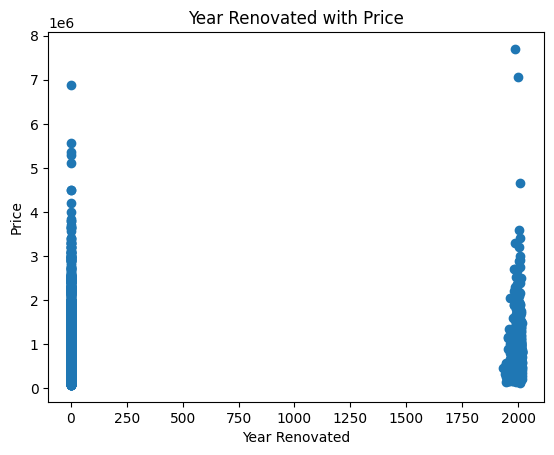

In [ ]:
plt.scatter(x = df.yr_renovated ,y = df.price)
plt.title("Year Renovated with Price")
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.show()

In [ ]:
len(df.columns)

26

In [ ]:
corr = df.corr()

<Axes: >

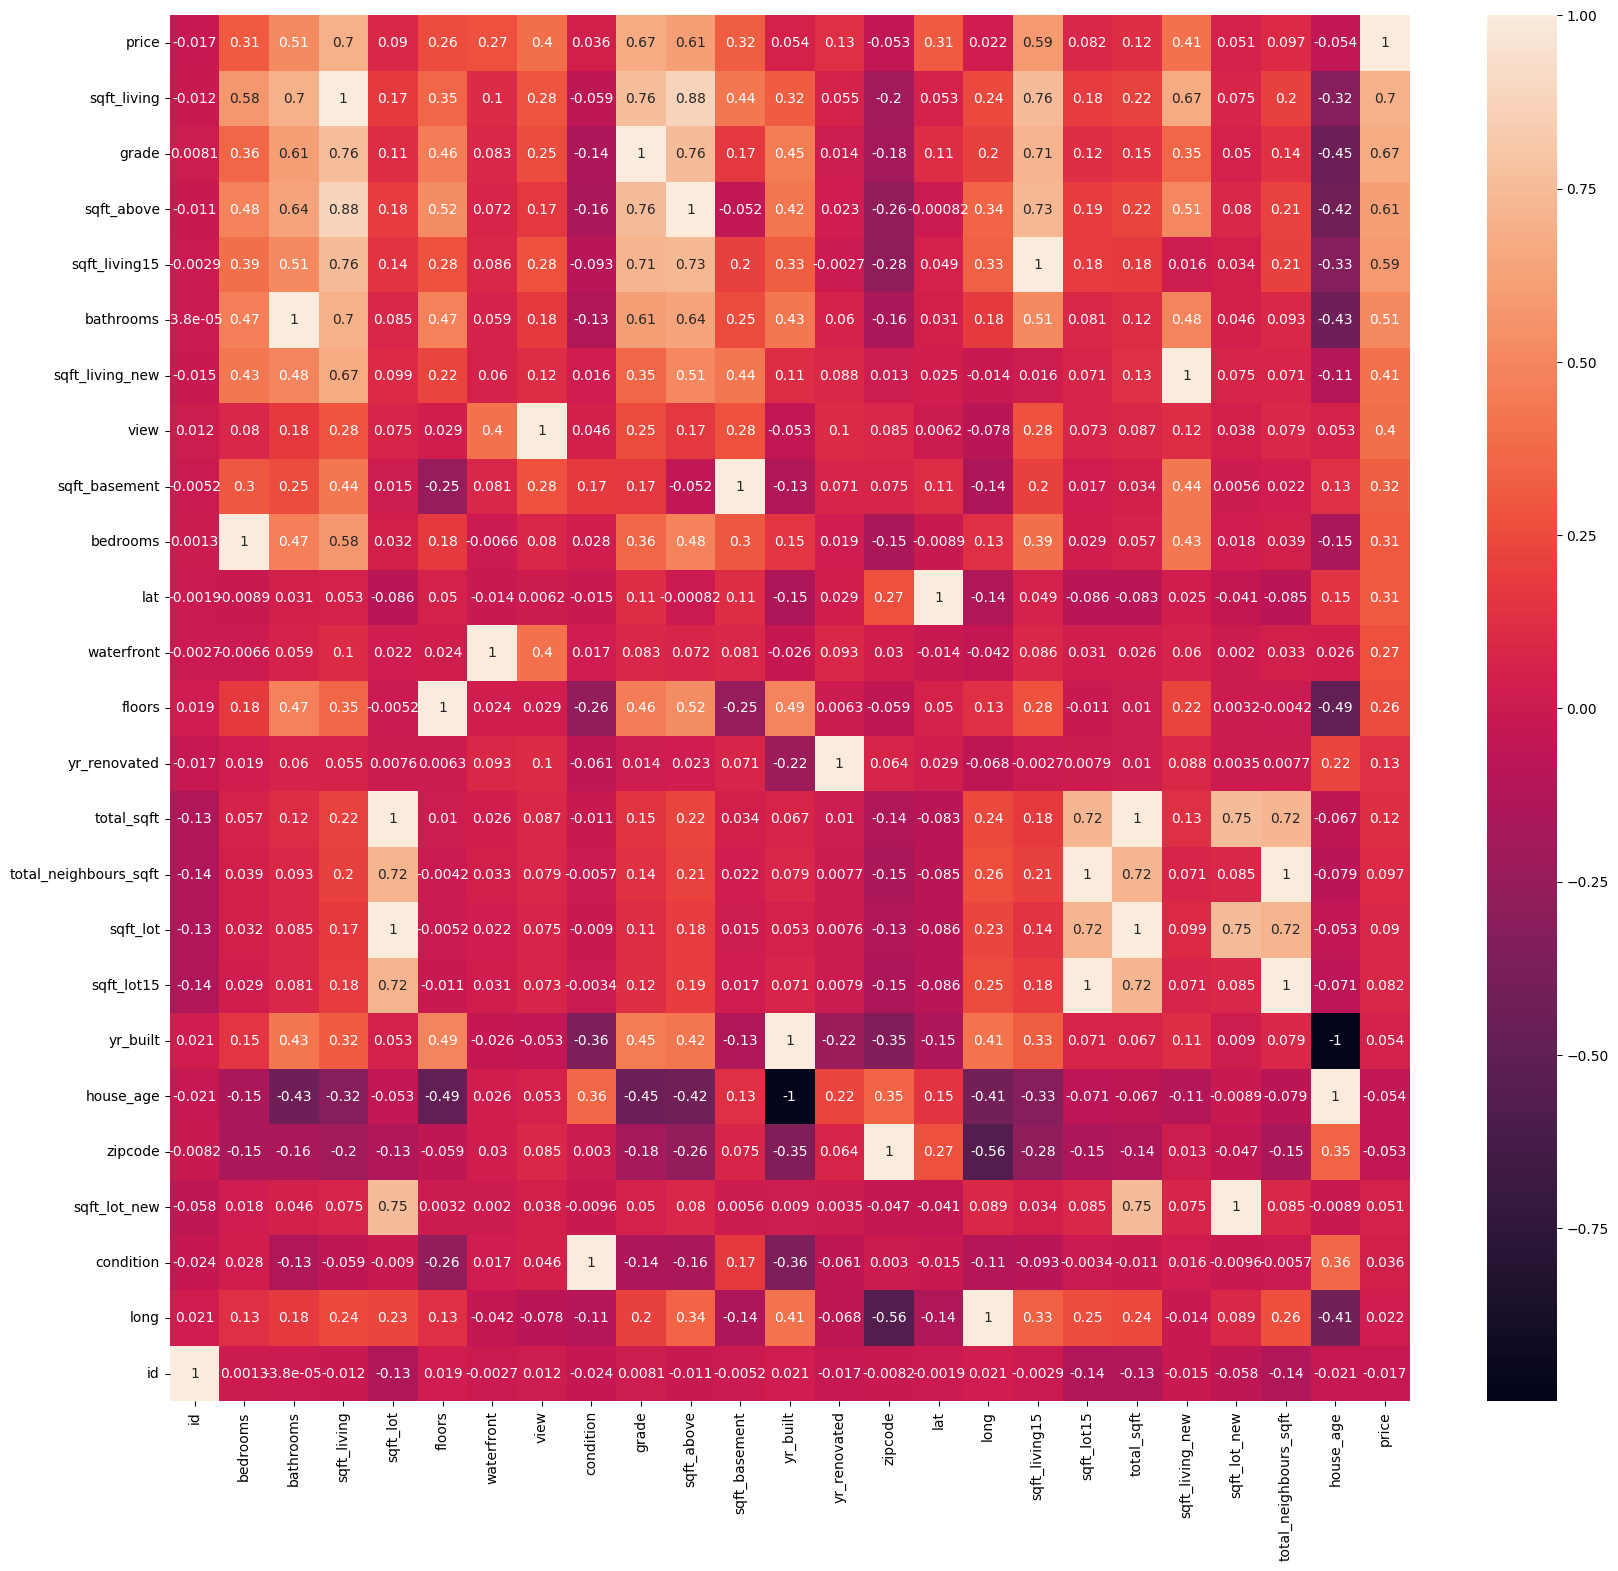

In [ ]:
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(df.corr().sort_values(by='price', ascending=False, key=abs), annot=True)

In [ ]:
relevant_features = corr['price'].abs().sort_values(ascending=False)[:15]
relevant_features = dict(relevant_features[1:])
print(relevant_features)
relevant_features.pop("sqft_living_new")
selected_features = list(relevant_features.keys())
print(selected_features)

{'sqft_living': 0.7020350546118006, 'grade': 0.6674342560202353, 'sqft_above': 0.6055672983560784, 'sqft_living15': 0.5853789035795692, 'bathrooms': 0.5100715562881949, 'sqft_living_new': 0.40539166353564443, 'view': 0.39729348829450284, 'sqft_basement': 0.32381602071198434, 'bedrooms': 0.3083495981456394, 'lat': 0.3070034799952553, 'waterfront': 0.26636943403060204, 'floors': 0.2567938875507189, 'yr_renovated': 0.1264337934408933, 'total_sqft': 0.11976288798316177}
['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'total_sqft']


<Axes: xlabel='price'>

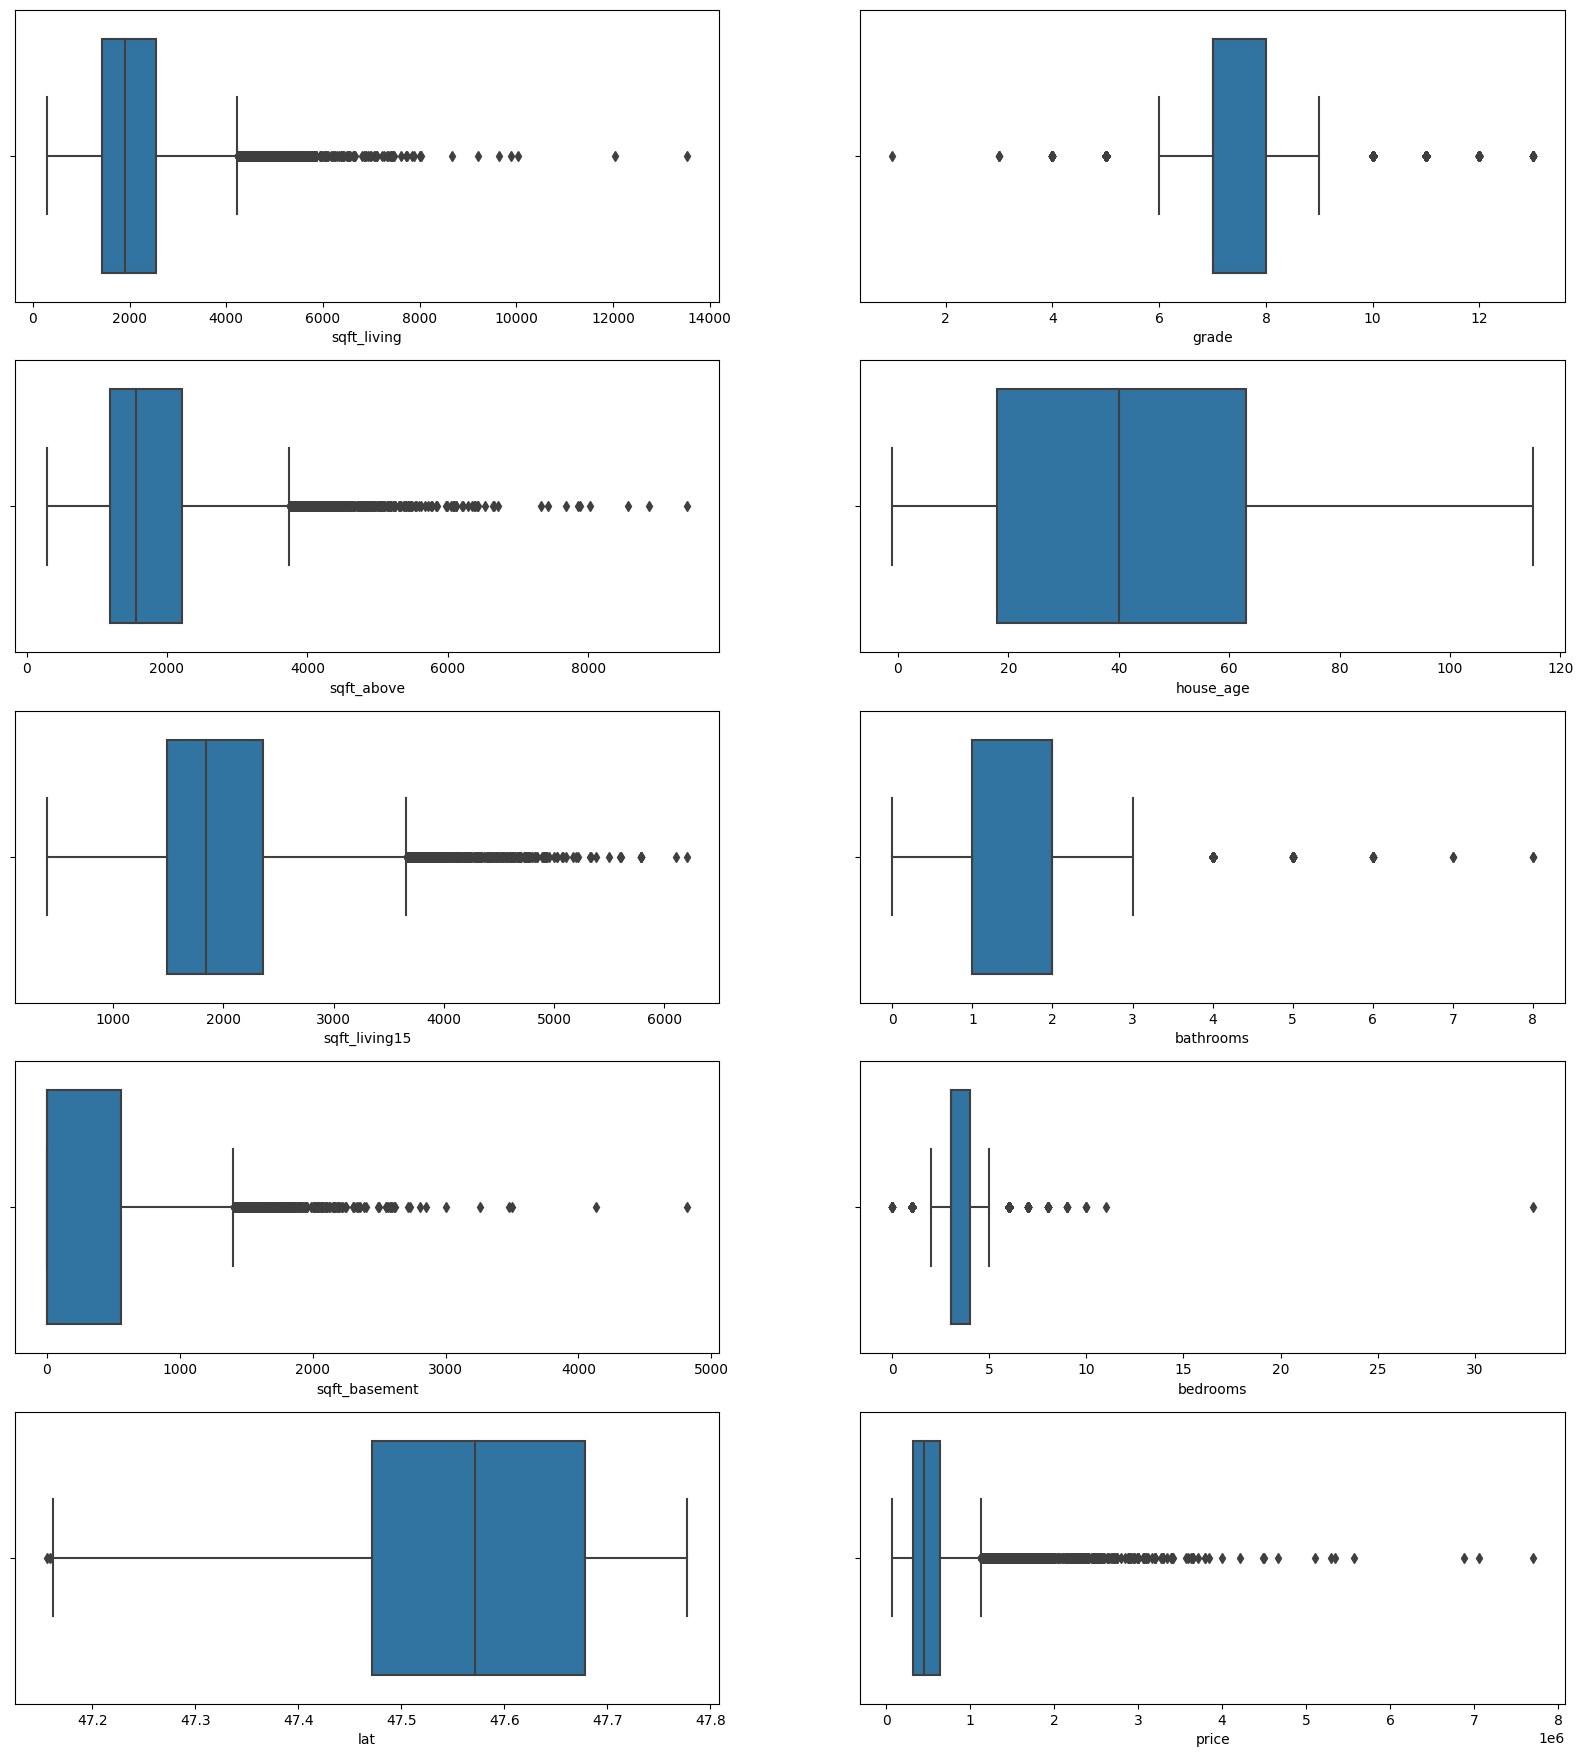

In [ ]:
columns = ['sqft_living', 'grade', 'sqft_above', 'house_age', 'sqft_living15', 'bathrooms', 'sqft_basement', 'bedrooms', 'lat']
fig, ax = plt.subplots(5, 2, figsize=(20, 22))
for index in range(len(columns)):
  plt.subplot(5, 2, index+1)
  sns.boxplot(df, x=columns[index])
plt.subplot(5, 2, 10)
sns.boxplot(df, x='price')

In [ ]:
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in sqft_living: 572
Number of outliers in grade: 1436
Number of outliers in sqft_above: 348
Number of outliers in house_age: 0
Number of outliers in sqft_living15: 195
Number of outliers in bathrooms: 76
Number of outliers in sqft_basement: 361
Number of outliers in bedrooms: 329
Number of outliers in lat: 0


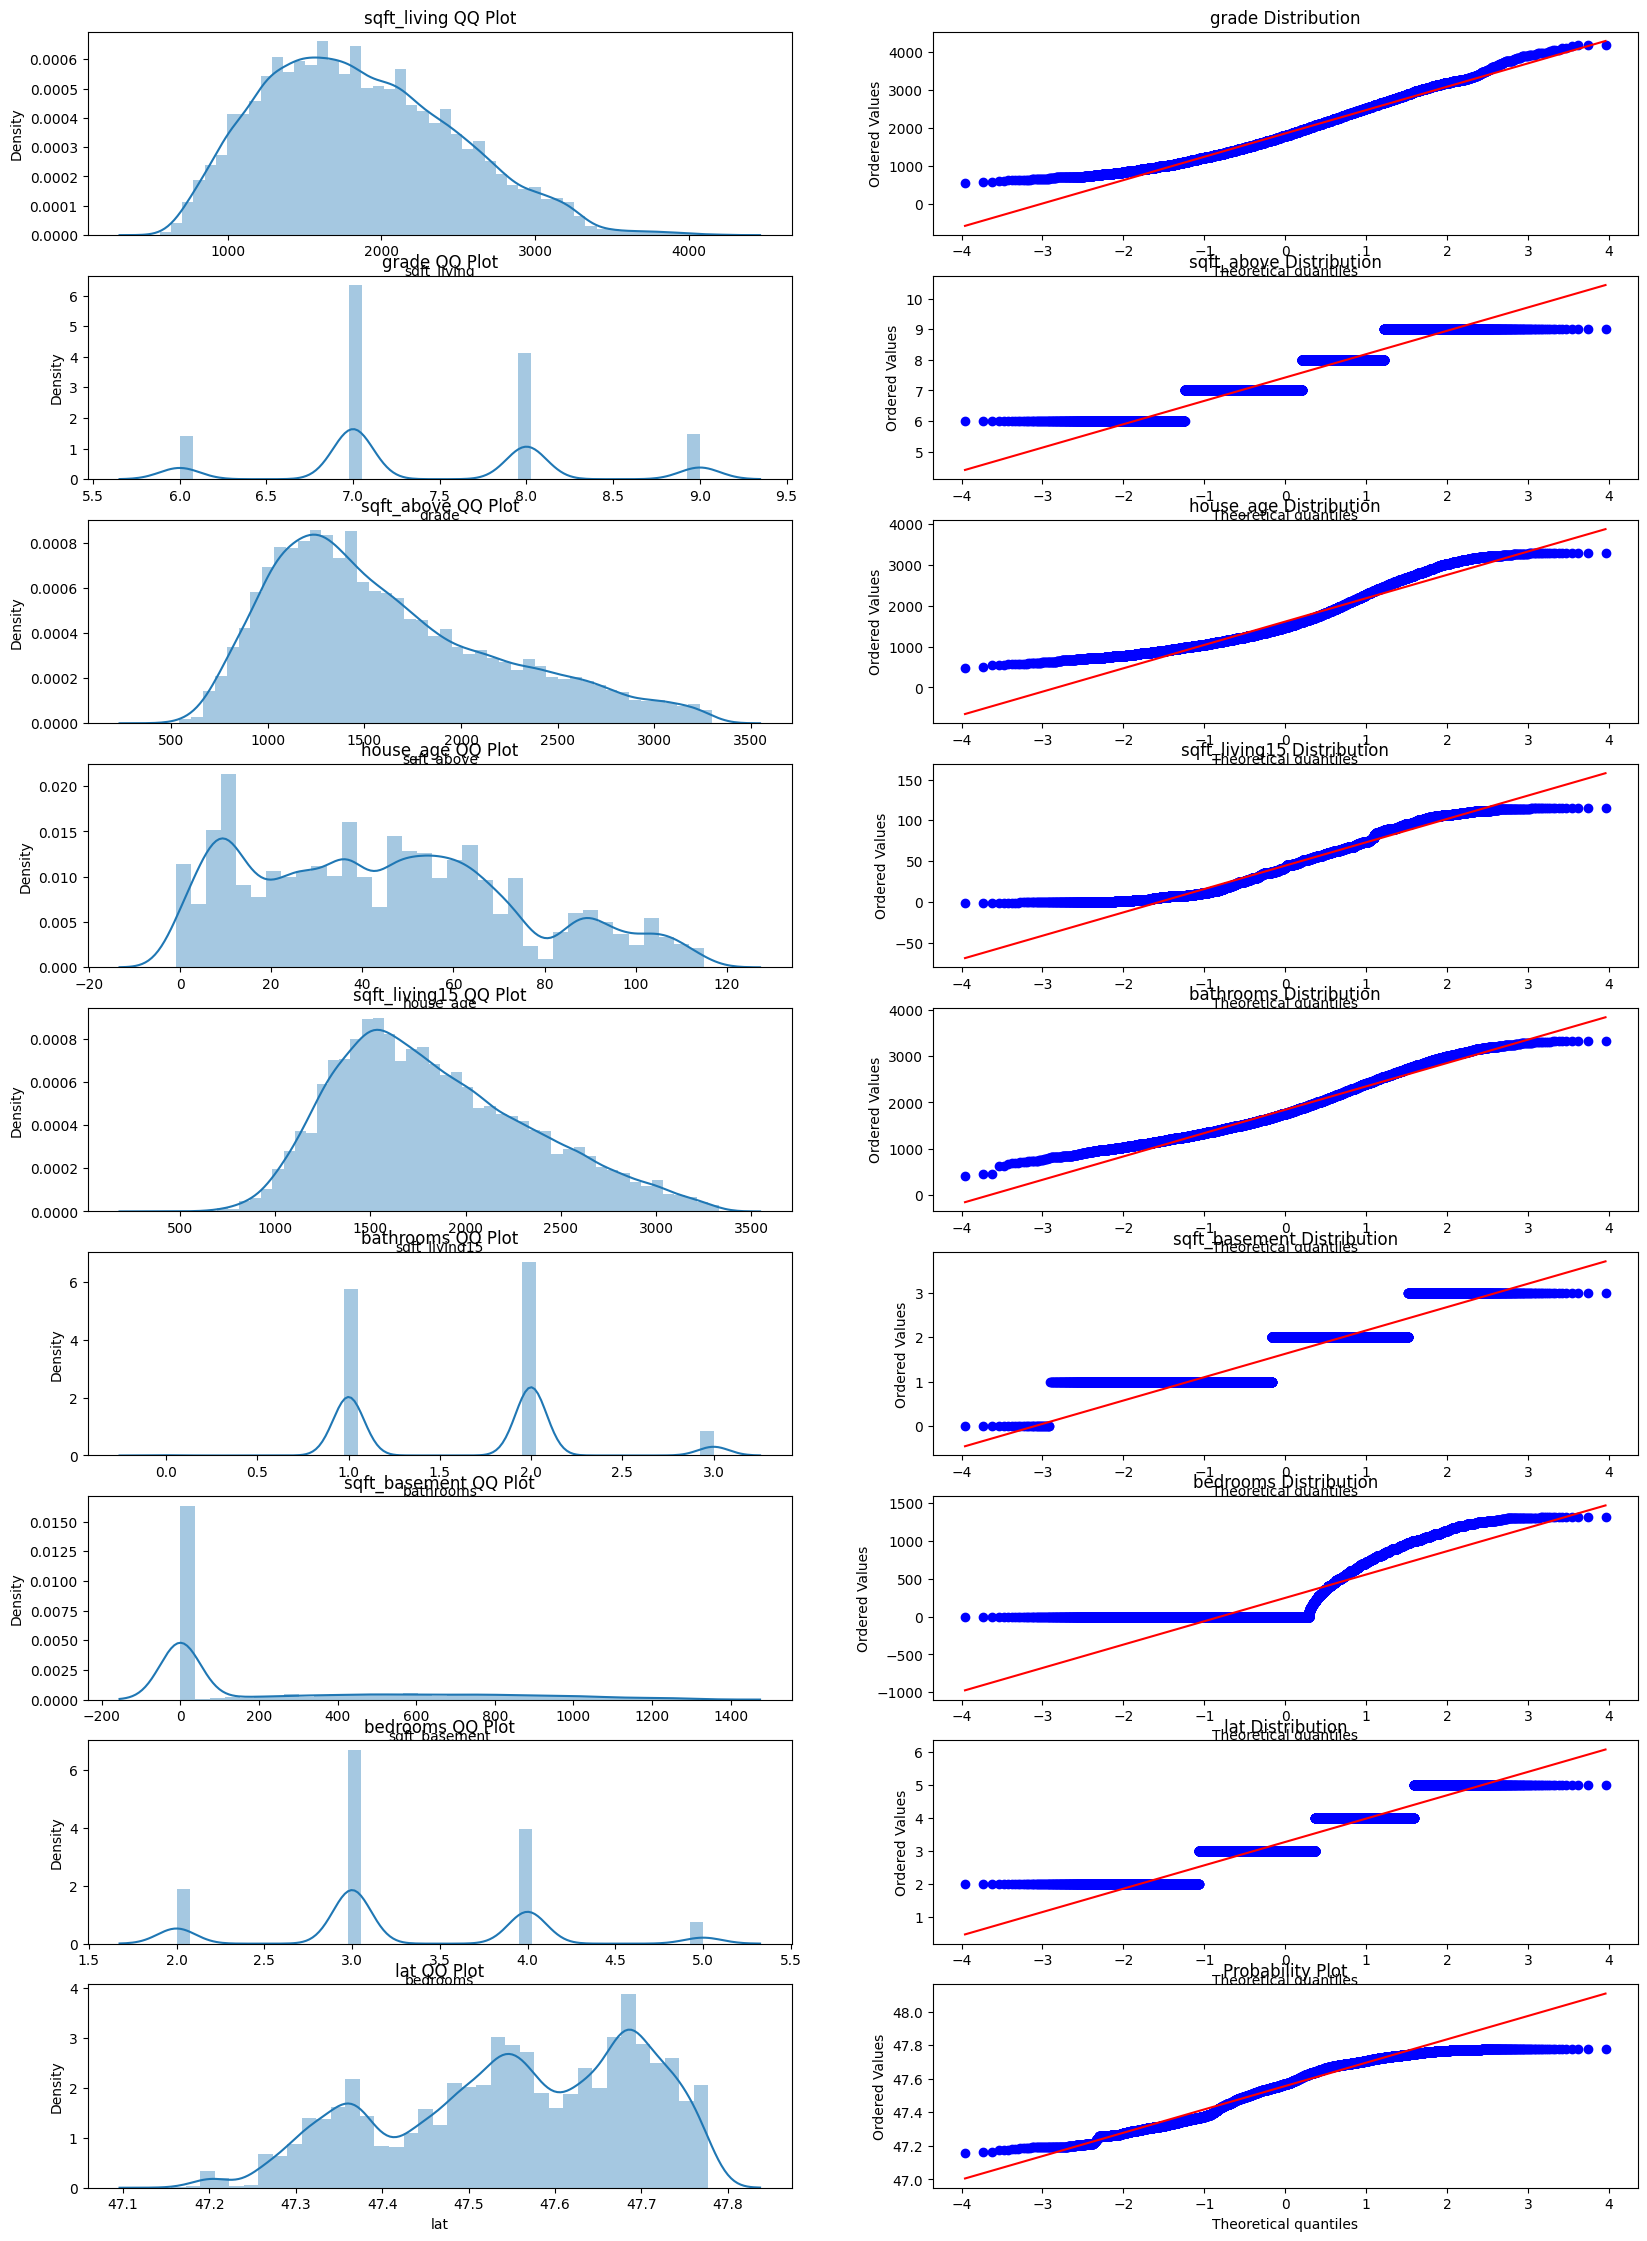

In [ ]:
fig, ax = plt.subplots(9, 2, figsize=(20, 28))
warnings.filterwarnings('ignore')
for index in range(len(columns)):
  plt.title(f'{columns[index]} Distribution')
  plt.subplot(9, 2, 2 * index + 1)
  sns.distplot(df[columns[index]])
  plt.title(f'{columns[index]} QQ Plot')
  plt.subplot(9, 2, 2 * index + 2)
  stats.probplot(df[columns[index]], dist="norm", plot=plt)


In [ ]:
x = df.drop('price', axis=1)
x = x[selected_features[:13]]
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
regression = LinearRegression()
linear_reg = regression.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
print("Score for train: ", linear_reg.score(x_train, y_train))
print("Score for test: ", linear_reg.score(x_test, y_test))
print("Mean Squared Error: ", np.sqrt(MSE(y_test, y_pred)))

Score for train:  0.5671388531963084
Score for test:  0.5799443917627762
Mean Squared Error:  137023.13501572004


In [ ]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(x)
regression = LinearRegression()
poly_reg = regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print("Score for train: ", poly_reg.score(x_train, y_train))
print("Score for test: ", poly_reg.score(x_test, y_test))
print("Mean Squared Error: ", np.sqrt(MSE(y_test, y_pred)))

Score for train:  0.5671388531963084
Score for test:  0.5799443917627762
Mean Squared Error:  137023.13501572004


In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
y_pred = dt_reg.predict(x_test)
print("Score for train: ", dt_reg.score(x_train, y_train))
print("Score for test: ", dt_reg.score(x_test, y_test))
print("Mean Squared Error: ", np.sqrt(MSE(y_test, y_pred)))

Score for train:  0.9981269404233715
Score for test:  0.5483741322609839
Mean Squared Error:  142079.00614459882


In [ ]:
xgb_reg = xg.XGBRegressor(objective ='reg:squarederror')
xgb_reg.fit(x_train, y_train)
y_pred = xgb_reg.predict(x_test)
print("Score for train: ", xgb_reg.score(x_train, y_train))
print("Score for test: ",xgb_reg.score(x_test, y_test))
print("Mean Squared Error: ", np.sqrt(MSE(y_test, y_pred)))

Score for train:  0.9117425951291513
Score for test:  0.7797773052419713
Mean Squared Error:  99213.67626841766


In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_pred = rf_reg.predict(x_test)
print("Score for train: ", rf_reg.score(x_train, y_train))
print("Score for test: ", rf_reg.score(x_test, y_test))
print("Mean Squared Error: ", np.sqrt(MSE(y_test, y_pred)))

Score for train:  0.9663321424343339
Score for test:  0.7838562043705705
Mean Squared Error:  98290.5788836396
